In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
dataset = pd.read_csv('/content/Tweets.csv')

In [30]:
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:,-1].values

In [31]:
print(X)

[[570306133677760513 'neutral' 1.0 ... nan '2015-02-24 11:35:52 -0800'
  nan]
 [570301130888122368 'positive' 0.3486 ... nan
  '2015-02-24 11:15:59 -0800' nan]
 [570301083672813571 'neutral' 0.6837 ... nan '2015-02-24 11:15:48 -0800'
  'Lets Play']
 ...
 [569587242672398336 'neutral' 1.0 ... nan '2015-02-22 11:59:15 -0800'
  'Nigeria,lagos']
 [569587188687634433 'negative' 1.0 ... nan '2015-02-22 11:59:02 -0800'
  'New Jersey']
 [569587140490866689 'neutral' 0.6771 ... nan '2015-02-22 11:58:51 -0800'
  'dallas, TX']]


In [32]:
print(y)

['Eastern Time (US & Canada)' 'Pacific Time (US & Canada)'
 'Central Time (US & Canada)' ... nan 'Eastern Time (US & Canada)' nan]


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
print(dataset.shape)

(14640, 15)


In [35]:
dataset.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [37]:
dataset = dataset[dataset['airline_sentiment'] != 'neutral']
print(dataset.shape)
dataset.head(5)

(11541, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


In [39]:
dataset["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [40]:
sentiment_label = dataset.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [42]:
tweet = dataset.text.values

In [94]:
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1

In [95]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [96]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d_8 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
_______________________________________________

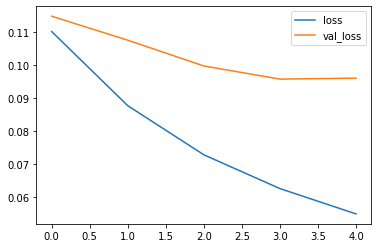

<Figure size 432x288 with 0 Axes>

In [98]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [99]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  negative
Predicted label:  negative
